In [1]:
import astropy.units as u
import time
import numpy as np
import pandas as pd
from astropy.table import Table 
from astropy.table import vstack as avstack
from astroquery.vizier import Vizier
from astroquery.mast import Catalogs
from astroquery.simbad import Simbad
Simbad.add_votable_fields('sptype', 'ids')

In [ ]:
def query_KIC(self, ID = None, radius = 10.0*u.arcsec):
    import warnings
    from astropy.utils.metadata import MergeConflictWarning
    warnings.filterwarnings("ignore", category = MergeConflictWarning)

    if not ID:
        ID = a.IDs['KIC']

    tbl = Table(names = ('KIC',), dtype = (int,))
    for i, id in enumerate(ID):
        if not isinstance(id, str):
            add_empty_row(tbl)
        else:
            job = Vizier.query_object(object_name = id, catalog = 'V/133/kic', radius = 10.0*u.arcsec)

            if len(job) == 0:
                add_empty_row(tbl)
            else:
                tbl = avstack([tbl, job[0]])      
                
    self.KIC = tbl
    return self.KIC

In [ ]:
def query_TWOMASS(self, ID = None, radius = 10.0*u.arcsec):
    #import warnings
    #from astropy.utils.metadata import MergeConflictWarning
    #warnings.filterwarnings("ignore", category = MergeConflictWarning)

    if not ID:
        ID = a.IDs['2MASS']

    tbl = Table(names = ('_2MASS',), dtype = (int,))
    for i, id in enumerate(ID):
        if not isinstance(id, str):
            add_empty_row(tbl)
        else:
            job = Vizier.query_object(object_name = id, catalog = 'II/246/out', radius = 10.0*u.arcsec)

            add_to_table(job, tbl, '_2MASS')
                
    self.TWOMASS = tbl
    return self.TWOMASS

def add_to_table(job, tbl, identifier):
    if len(job) == 0:
        add_empty_row(tbl)
    else:
        for i, row in enumerate(job[0]):
            if row[identifier] in id:
                tbl = avstack([tbl, row])
                break

In [9]:
twomassjob = Vizier.query_object(object_name = '2MASS J05065012+5236338', catalog = 'II/246/out', radius = 10.0*u.arcsec)

In [ ]:
ticjob = Catalogs.query_object("TIC 141411201", radius=10.0*u.arcsec, catalog="TIC",  objType='STAR')

In [4]:
TYC2job = Vizier.query_object(object_name = 'TYC 3130-722-1', catalog = 'I/259/tyc2', radius = 10.0*u.arcsec)


In [11]:
allwisejob = Vizier.query_object(object_name = 'WISE J050650.20+523631.2', catalog = 'II/328/allwise', radius = 10.0*u.arcsec)


In [16]:
twomassjob[0]

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,bytes17,float32,float32,float32,float32,float32,float32,bytes3,bytes3,bytes3,bytes3,uint8,uint8
76.710025,52.606792,05065040+5236244,16.547,0.141,16.238,0.207,15.703,--,BCU,220,110,000,0,0
76.708848,52.609409,05065012+5236338,15.746,0.071,15.354,0.106,15.596,0.199,AAC,222,111,000,0,0


In [21]:
np.where(twomassjob[0]['_2MASS'] in '2MASS J05065012+5236338')

TypeError: 'in <string>' requires string as left operand, not MaskedColumn

In [23]:
for entry in twomassjob[0]['_2MASS']:
    if entry in '2MASS J05065012+5236338':
        print( entry)

05065012+5236338


In [35]:
for i, entry in enumerate(twomassjob[0]):
    if  entry['_2MASS'] in '2MASS J05065012+5236338':
        print(i,entry)

1  RAJ2000    DEJ2000        _2MASS       Jmag  e_Jmag  Hmag  e_Hmag  Kmag  e_Kmag Qflg Rflg Bflg Cflg Xflg Aflg
   deg        deg                       mag    mag    mag    mag    mag    mag                                
---------- ---------- ---------------- ------ ------ ------ ------ ------ ------ ---- ---- ---- ---- ---- ----
 76.708848  52.609409 05065012+5236338 15.746  0.071 15.354  0.106 15.596  0.199  AAC  222  111  000    0    0


In [33]:
row

['05065012+5236338']

In [37]:
class a():
    def __init__(self):
        sefl.TWOMASS = 1

In [1]:
import lightkurve as lk

In [25]:
lc = lk.search_lightcurvefile('KIC10666592', cadence = 'short').download_all().PDCSAP_FLUX

In [26]:
lc = lc.stitch().remove_nans().normalize().remove_outliers()

ValueError: This collection contains more than one target, please reduce to a single target before calling `stitch()`.

In [20]:
t,d = lc.time, lc.flux

In [13]:
from matplotlib.pyplot import *

(200, 250)

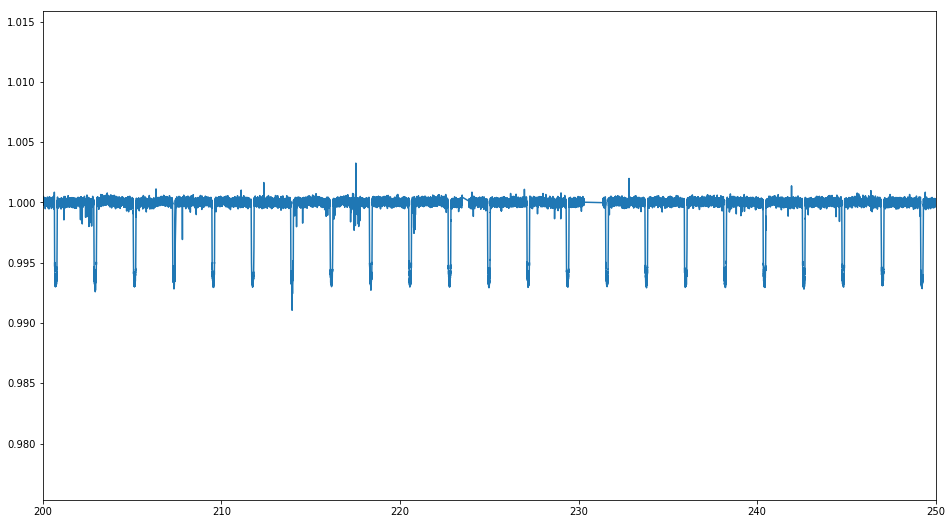

In [17]:
figure(figsize = (16,9))
plot(t,d)
xlim(200,250)

In [22]:
pg = lc.to_periodogram(normalization ='psd')

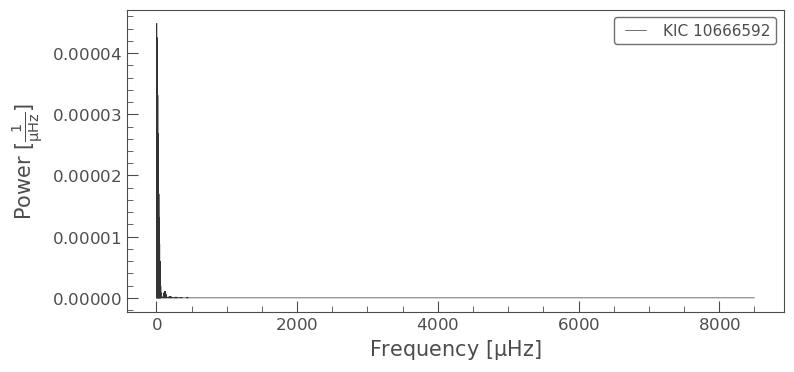

In [24]:
pg.plot()